In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<a id="1"></a> <br>
## Load the Data

In [3]:
smp = pd.read_csv("/Users/dinhbuithulinh/Desktop/STUDY/Time Series/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv" , encoding='utf-8', sep=';' )

<a id="3"></a> <br>
## Data Cleaning

In [4]:
smp.head()

,Ng鄖,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [5]:
feats = ['12', '13']

In [6]:
smp[feats].head()

,12,13
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1010.8,1010.8
4,1061.5,1061.5


<a id="4"></a> <br>
## Data Visualization

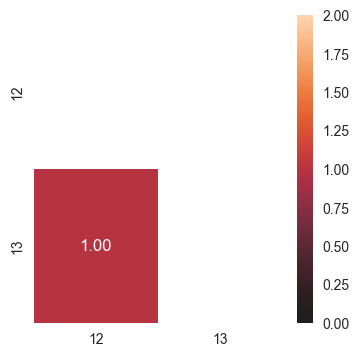

In [7]:
mask = np.triu(np.ones_like(smp[feats].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(smp[feats].corr(), mask=mask, vmax=2, vmin=0, center=0,annot=True,fmt='.2f');

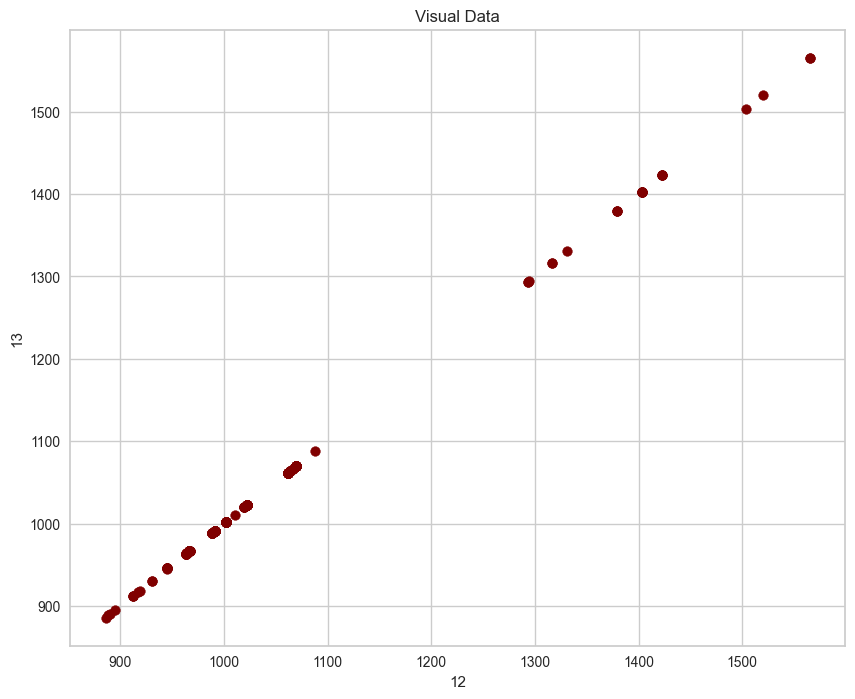

In [8]:
import matplotlib.pyplot as plt

# Giả sử PCA_ds đã được giảm xuống còn 2 thành phần
x = smp["12"]
y = smp["13"]

# Vẽ biểu đồ 2D
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("Visual Data")
ax.set_xlabel("12")
ax.set_ylabel("13")
plt.show()


In [11]:
smp.rename(columns = {'Ng鄖':'Ngày'}, inplace = True)

In [13]:
import plotly.graph_objects as go

fig = go.Figure()
# Add the first line for column '12'
fig.add_trace(go.Scatter(x=smp['Ngày'], y=smp['12'],
                         mode='lines',
                         name='Column 12',
                         line=dict(color='black')))

# Add the second line for column '13'
fig.add_trace(go.Scatter(x=smp['Ngày'], y=smp['13'],
                         mode='lines',
                         name='Column 13',
                         line=dict(color='red')))

# Update layout
fig.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Cột 12 và 13",
    title={'text': "Data", 'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'}
)

# Show the plot
fig.show()


In [14]:
transformer = StandardScaler()
X = transformer.fit_transform(np.array(smp[feats]))

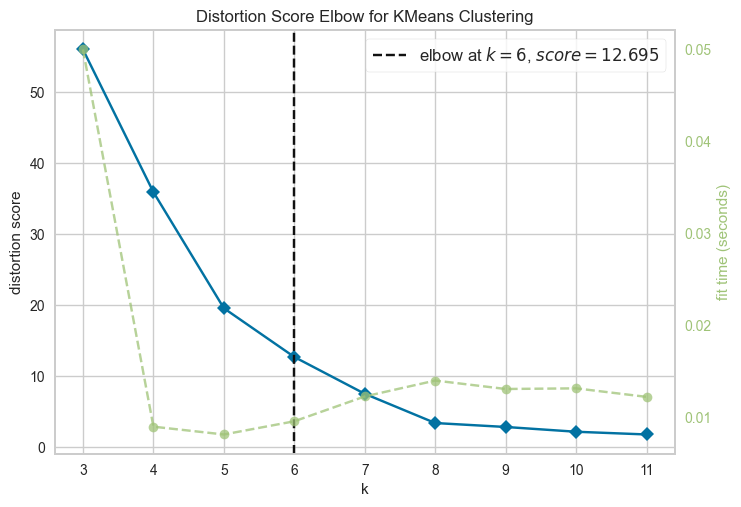

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(3,12))
Elbow_M.fit(X)
Elbow_M.show();

In [18]:
from sklearn.mixture import BayesianGaussianMixture

# Initialize the BayesianGaussianMixture model
BGM = BayesianGaussianMixture(n_components=6, covariance_type='full', random_state=1, n_init=15)

# Fit the model and predict clusters
preds = BGM.fit_predict(X)

# Add the predicted clusters to the DataFrame
smp["Clusters"] = preds

# Optionally, you can print or inspect the first few rows to verify
print(smp.head())

         Ngày       1       2       3       4       5       6       7       8  \
0  01/01/2021   964.4   964.4   964.4   964.4   964.4   964.4   964.4   964.4   
1  01/02/2021  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7   
2  01/03/2021   988.4   988.4   988.4   988.4   988.4   988.4   988.4   988.4   
3  01/04/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
4  01/05/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   

        9  ...      40      41      42      43      44      45      46  \
0   964.4  ...   964.4   964.4   964.4   964.4   964.4   964.4   964.4   
1  1019.7  ...  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7   
2   988.4  ...   988.4   988.4   988.4   988.4   988.4   988.4   988.4   
3  1002.1  ...  1010.8  1010.8  1010.8  1010.8  1010.8  1010.8  1010.8   
4  1061.5  ...  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   

       47      48  Clusters  
0   964.4   964.4         0  
1  1019.

In [19]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(6)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(6):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

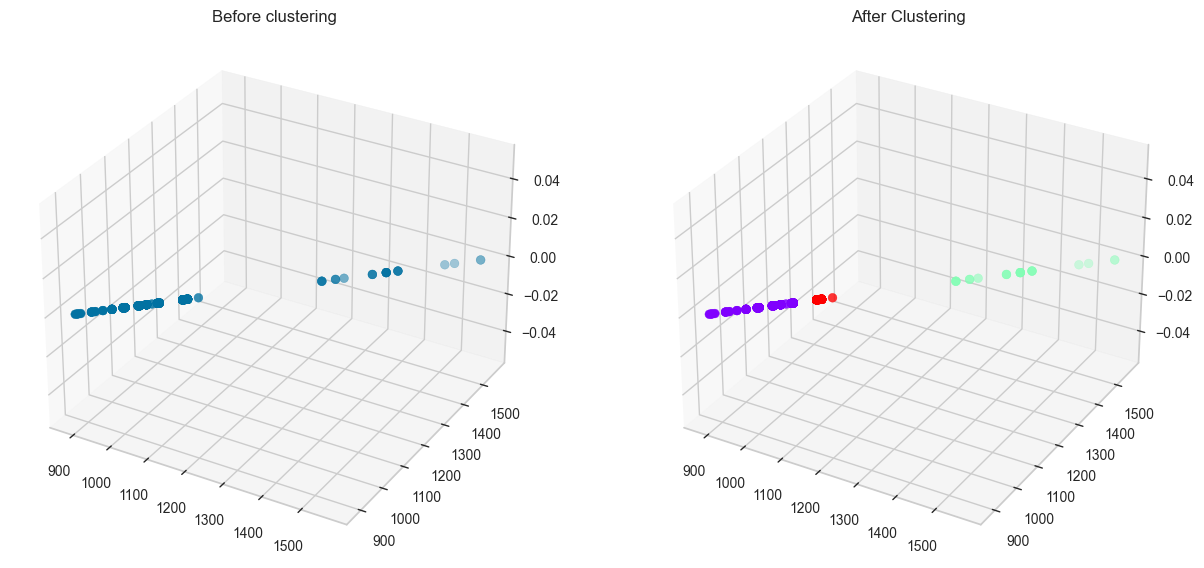

In [21]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(smp['12'], smp['13'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(smp['12'], smp['13'], s=40, c=smp["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

<a id="5"></a> <br>
## Time Series Prediction with LSTM

In [23]:
df = smp[['Ngày', '12','13']]

In [24]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
test_size = 30

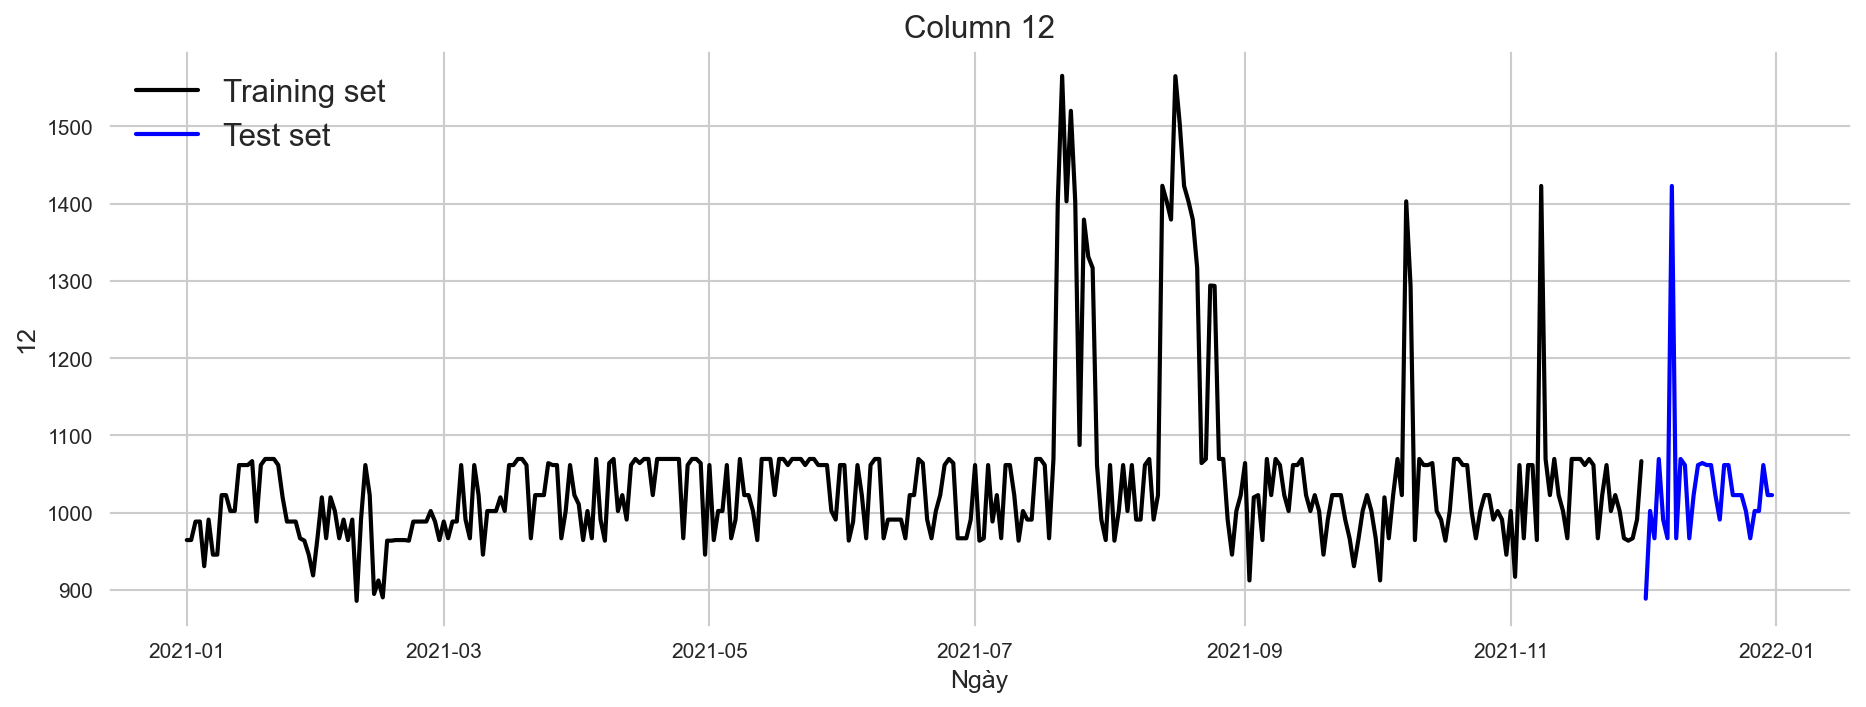

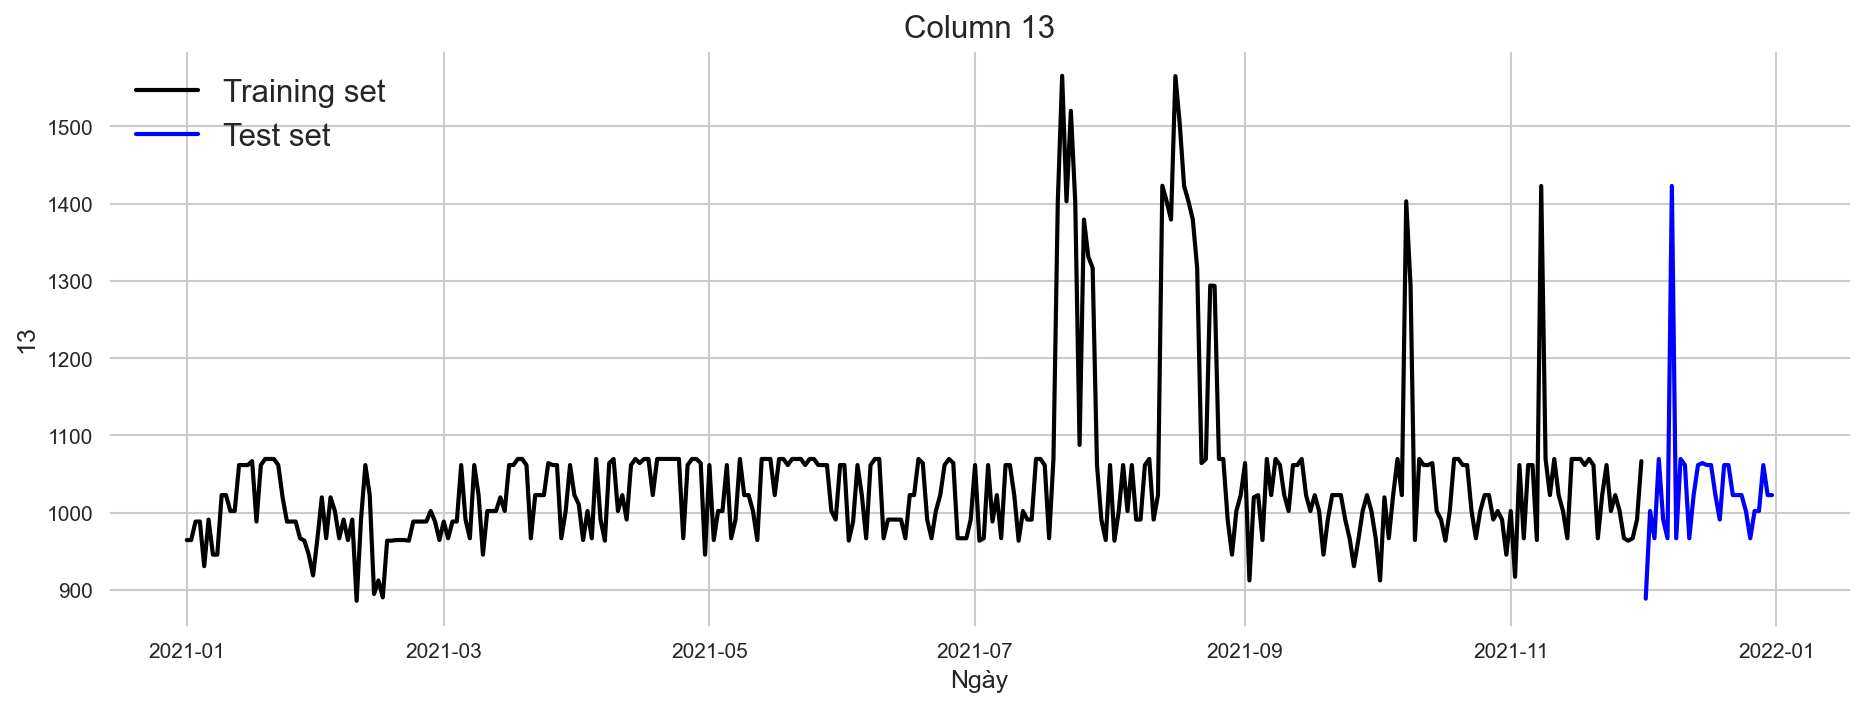

In [26]:
# Plot for column '12'
plt.figure(figsize=(15, 5), dpi=150)
plt.rc('axes', edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['12'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['12'][-test_size:], color='blue', lw=2)
plt.title('Column 12', fontsize=15)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('12', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.show()

# Plot for column '13'
plt.figure(figsize=(15, 5), dpi=150)
plt.rc('axes', edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['13'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['13'][-test_size:], color='blue', lw=2)
plt.title('Column 13', fontsize=15)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('13', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.show()


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['12','13']].values.reshape(-1,1))

MinMaxScaler()

Epoch 1/30
9/9 [==============================] - 7s 707ms/step - loss: 0.0667 - val_loss: 0.0410
Epoch 2/30
9/9 [==============================] - 6s 628ms/step - loss: 0.0564 - val_loss: 0.0375
Epoch 3/30
9/9 [==============================] - 6s 623ms/step - loss: 0.0369 - val_loss: 0.0213
Epoch 4/30
9/9 [==============================] - 6s 703ms/step - loss: 0.0247 - val_loss: 0.0163
Epoch 5/30
9/9 [==============================] - 6s 702ms/step - loss: 0.0222 - val_loss: 0.0164
Epoch 6/30
9/9 [==============================] - 6s 660ms/step - loss: 0.0215 - val_loss: 0.0163
Epoch 7/30
9/9 [==============================] - 6s 728ms/step - loss: 0.0217 - val_loss: 0.0163
Epoch 8/30
9/9 [==============================] - 6s 646ms/step - loss: 0.0209 - val_loss: 0.0166
Epoch 9/30
9/9 [==============================] - 6s 643ms/step - loss: 0.0200 - val_loss: 0.0165
Epoch 10/30
9/9 [==============================] - 6s 655ms/step - loss: 0.0186 - val_loss: 0.0169
Epoch 11/30
9/9 [==

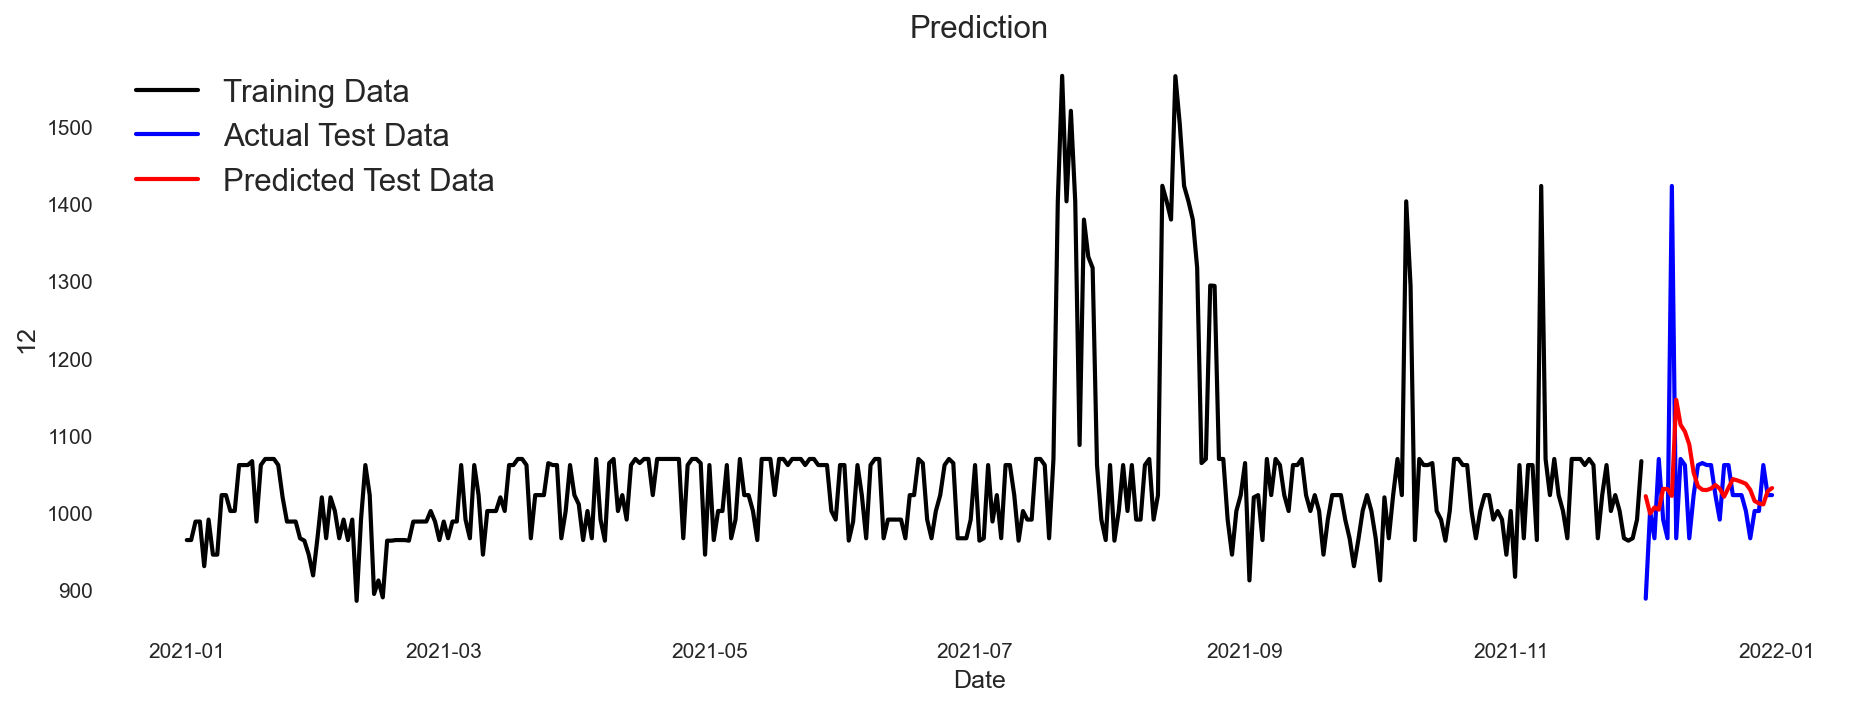

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Parameters
test_size = 30
window_size = 60

# Scaler
scaler = MinMaxScaler()
scaler.fit(df[['12', '13']])
scaled_data = scaler.transform(df[['12', '13']])

train_data = scaled_data[:-test_size]
test_data = scaled_data[-test_size-window_size:]

# Train/Test
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = [], []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i])
    y_test.append(test_data[i])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

# LSTM model
def define_model():
    model = Sequential()
    model.add(LSTM(999, activation='relu', input_shape=(window_size, 2), return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(2))
    model.compile(optimizer='adam', loss='mse')
    return model

model = define_model()
history = model.fit(X_train, y_train, epochs=30, batch_size=30, validation_split=0.1, verbose=1)

# Evaluate the model
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Reverse the scaling for visualization
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

# Plotting the results for column '12'
plt.figure(figsize=(15, 5), dpi=150)
plt.rc('axes', edgecolor='white')

# Extract original training data for column '12'
train_data_col_12 = scaler.inverse_transform(train_data)[:, 0]

# Plot training data
plt.plot(df['Ngày'].iloc[:len(train_data_col_12)], train_data_col_12, color='black', lw=2, label='Training set')

# Plot actual test data for column '12'
plt.plot(df['Ngày'].iloc[-test_size:], y_test_true[:, 0], color='blue', lw=2, label='Test set - True')

# Plot predicted test data for column '12'
plt.plot(df['Ngày'].iloc[-test_size:], y_test_pred[:, 0], color='red', lw=2, label='Test set - Predicted')

plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('12', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()


In [59]:
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)

-0.22327002048564948
0.13682554340124278
